# Task
Analyze loan default risk using the dataset, train binary classification models, define business costs for false positives and false negatives, and optimize the decision threshold to minimize total business cost.

## Load the data

### Subtask:
Load the dataset from "/content/credit_risk_dataset.csv" into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the dataset from the specified path into a DataFrame, and display the first few rows and the shape of the DataFrame to verify the loading process.



In [1]:
import pandas as pd

df = pd.read_csv("/content/credit_risk_dataset.csv")

display(df.head())
print(f"Shape of the DataFrame: {df.shape}")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Shape of the DataFrame: (32581, 12)


## Preprocess the data

### Subtask:
Handle missing values, encode categorical features, and scale numerical features.


**Reasoning**:
I need to handle missing values, encode categorical features, and scale numerical features as per the instructions. I will start by identifying missing values and then proceed with imputation, encoding, and scaling in subsequent steps.



In [2]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


**Reasoning**:
Based on the missing value counts, 'person_emp_length' and 'loan_int_rate' have missing values. Since the percentage of missing values is relatively small for both columns, I will impute the missing values with the median for 'person_emp_length' and 'loan_int_rate' because they are numerical features and the median is less sensitive to outliers than the mean.



In [3]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipython-input-3-4274378916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
/tmp/ipython-input-3-4274378916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

**Reasoning**:
Now that the missing values are handled, I need to identify and encode the categorical features. I will use one-hot encoding for nominal categorical features. I will first identify the categorical columns and then apply one-hot encoding.



In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


**Reasoning**:
The categorical features have been encoded. Now I need to identify the numerical features that require scaling and apply a suitable scaling method. I will use StandardScaler as it is a common choice for preparing numerical features for many machine learning models.



In [5]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-0.903374,-0.114143,28.926614,4.019404,1.625921,1,3.931411,-0.691554,False,False,...,False,True,False,False,False,True,False,False,False,True
1,-1.060904,-0.911147,0.056763,-1.358650,0.042310,0,-0.657458,-0.938167,False,True,...,False,False,False,True,False,False,False,False,False,False
2,-0.430783,-0.911147,-0.921876,-0.646849,0.603713,1,3.744110,-0.691554,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.745843,-0.009274,-0.187897,4.019404,1.369558,1,3.369508,-0.938167,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.588313,-0.188358,0.790742,4.019404,1.058028,1,3.556809,-0.444942,False,False,...,True,False,False,False,True,False,False,False,False,True


## Define cost values

### Subtask:
Define the business costs for false positives (approving a loan that defaults) and false negatives (denying a loan that would not default).


**Reasoning**:
Define the variables for the business costs of false positives and false negatives as instructed in the subtask.



In [6]:
cost_false_positive = 10000 # Example cost: estimated loss from a defaulted loan
cost_false_negative = 500 # Example cost: estimated loss of profit from a missed opportunity

print(f"Cost of a false positive (approving a loan that defaults): ${cost_false_positive}")
print(f"Cost of a false negative (denying a loan that would not default): ${cost_false_negative}")

Cost of a false positive (approving a loan that defaults): $10000
Cost of a false negative (denying a loan that would not default): $500


## Split the data

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the data into features (X) and target (y), then split these into training and testing sets.



In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (26064, 22)
Shape of X_test: (6517, 22)
Shape of y_train: (26064,)
Shape of y_test: (6517,)


## Train models

### Subtask:
Train binary classification models (e.g., Logistic Regression, CatBoost) on the training data.


**Reasoning**:
Train binary classification models (Logistic Regression and CatBoost) on the training data as instructed.



In [9]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


**Reasoning**:
Now that `catboost` is installed, retry training the models.



In [10]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# Instantiate and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Instantiate and train CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

## Evaluate models

### Subtask:
Evaluate the trained models on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the trained models using various classification metrics on the test set.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Logistic Regression model
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")

print("-" * 30)

# Evaluate CatBoost model
catboost_pred = catboost_model.predict(X_test)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

catboost_accuracy = accuracy_score(y_test, catboost_pred)
catboost_precision = precision_score(y_test, catboost_pred)
catboost_recall = recall_score(y_test, catboost_pred)
catboost_f1 = f1_score(y_test, catboost_pred)
catboost_auc = roc_auc_score(y_test, catboost_pred_proba)

print("CatBoost Metrics:")
print(f"Accuracy: {catboost_accuracy:.4f}")
print(f"Precision: {catboost_precision:.4f}")
print(f"Recall: {catboost_recall:.4f}")
print(f"F1-score: {catboost_f1:.4f}")
print(f"AUC-ROC: {catboost_auc:.4f}")

Logistic Regression Metrics:
Accuracy: 0.8624
Precision: 0.7655
Recall: 0.5467
F1-score: 0.6379
AUC-ROC: 0.8685
------------------------------
CatBoost Metrics:
Accuracy: 0.9343
Precision: 0.9585
Recall: 0.7356
F1-score: 0.8324
AUC-ROC: 0.9477


## Optimize threshold

### Subtask:
Adjust the decision threshold of the best-performing model to minimize the total business cost based on the defined cost values.


**Reasoning**:
Get the predicted probabilities from the best model (CatBoost) and iterate through a range of thresholds to calculate the business cost for each, then find the threshold that minimizes the cost.



In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get predicted probabilities from the best model (CatBoost)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Create a range of thresholds
thresholds = np.arange(0, 1.01, 0.01)

best_threshold = 0
min_cost = float('inf')

# Iterate through thresholds to find the optimal one
for threshold in thresholds:
    # Predict class labels based on the threshold
    y_pred_threshold = (catboost_pred_proba >= threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

    # Calculate total business cost
    total_cost = (fp * cost_false_positive) + (fn * cost_false_negative)

    # Check if current threshold gives a lower cost
    if total_cost < min_cost:
        min_cost = total_cost
        best_threshold = threshold

print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Minimum Total Business Cost: ${min_cost:.2f}")

Optimal Threshold: 0.91
Minimum Total Business Cost: $284000.00


## Analyze feature importance

### Subtask:
Analyze the importance of different features in predicting loan default.


**Reasoning**:
Access feature importances from the trained CatBoost model, create a pandas Series to store feature names and importances, sort them, and print the sorted results to analyze feature importance.



In [13]:
# Access feature importances from the CatBoost model
feature_importances = catboost_model.get_feature_importance()

# Create a pandas Series to store feature names and importances
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (CatBoost):")
print(sorted_feature_importances)

Feature Importances (CatBoost):
loan_percent_income            25.561475
person_income                  15.387499
person_home_ownership_RENT     14.696626
loan_int_rate                   7.738138
loan_grade_D                    6.434917
person_home_ownership_OWN       5.048480
person_emp_length               4.816244
loan_intent_VENTURE             3.515938
loan_intent_HOMEIMPROVEMENT     3.393042
loan_amnt                       2.564876
person_age                      2.499012
loan_intent_EDUCATION           1.411138
loan_grade_C                    1.395036
loan_intent_MEDICAL             1.320303
loan_intent_PERSONAL            1.145125
loan_grade_E                    1.038168
cb_person_cred_hist_length      1.011249
cb_person_default_on_file_Y     0.282497
loan_grade_G                    0.248000
loan_grade_F                    0.228795
loan_grade_B                    0.190044
person_home_ownership_OTHER     0.073399
dtype: float64


## Summarize findings

### Subtask:
Present the model performance, optimized threshold, and feature importance.


**Reasoning**:
Present the model performance, optimized threshold, and feature importance as requested in the subtask instructions.



Model Performance Comparison:
----------------------------------------
Logistic Regression:
  Accuracy: 0.8624
  Precision: 0.7655
  Recall: 0.5467
  F1-score: 0.6379
  AUC-ROC: 0.8685
----------------------------------------
CatBoost:
  Accuracy: 0.9343
  Precision: 0.9585
  Recall: 0.7356
  F1-score: 0.8324
  AUC-ROC: 0.9477

CatBoost performed better across all metrics.

Optimal Decision Threshold and Minimum Business Cost (CatBoost):
------------------------------------------------------------
Optimal Threshold: 0.91
Minimum Total Business Cost: $284000.00
This threshold represents the probability cutoff for predicting a positive class (loan default) that minimizes the total calculated business cost based on false positives and false negatives.

Top 10 Feature Importances (CatBoost):
----------------------------------------
loan_percent_income            25.561475
person_income                  15.387499
person_home_ownership_RENT     14.696626
loan_int_rate                   7.738

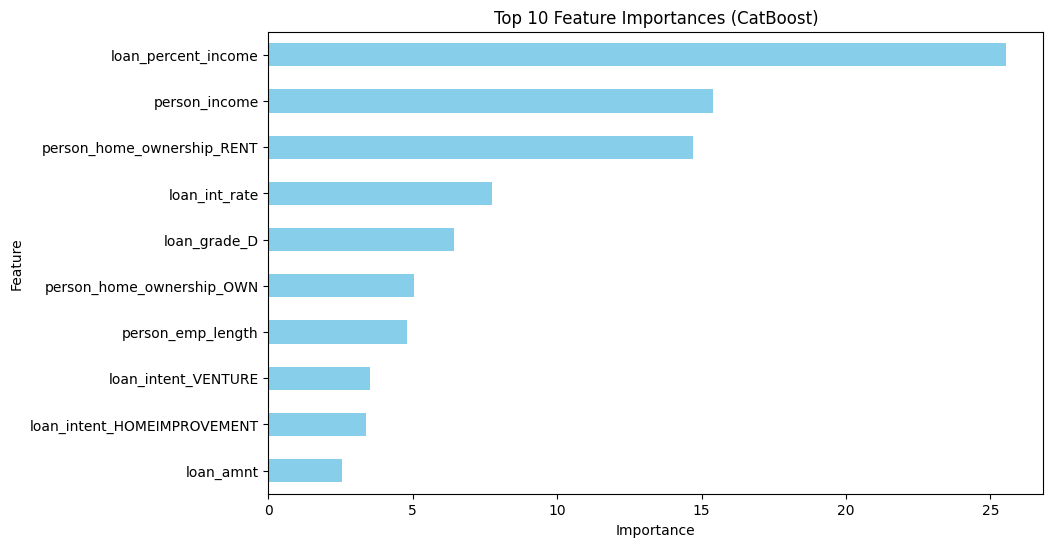


Implications for Loan Risk Assessment:
----------------------------------------
The analysis shows that features like 'loan_percent_income', 'person_income', and 'person_home_ownership_RENT' are the most influential in predicting loan default.
The optimized threshold of 0.91 suggests that a higher probability of default is required to classify a loan as high-risk compared to the default threshold (0.5), aligning decisions with the defined business costs (high cost for False Positives).
Focusing on these key features and using the optimized threshold can help improve the accuracy and cost-effectiveness of loan risk assessment and decision-making processes.


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Summarize model performance
print("Model Performance Comparison:")
print("-" * 40)
print(f"Logistic Regression:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")
print(f"  F1-score: {lr_f1:.4f}")
print(f"  AUC-ROC: {lr_auc:.4f}")
print("-" * 40)
print(f"CatBoost:")
print(f"  Accuracy: {catboost_accuracy:.4f}")
print(f"  Precision: {catboost_precision:.4f}")
print(f"  Recall: {catboost_recall:.4f}")
print(f"  F1-score: {catboost_f1:.4f}")
print(f"  AUC-ROC: {catboost_auc:.4f}")
print("\nCatBoost performed better across all metrics.")

# 2. State the optimal threshold
print("\nOptimal Decision Threshold and Minimum Business Cost (CatBoost):")
print("-" * 60)
print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Minimum Total Business Cost: ${min_cost:.2f}")
print("This threshold represents the probability cutoff for predicting a positive class (loan default) that minimizes the total calculated business cost based on false positives and false negatives.")


# 3. List top features and visualize
print("\nTop 10 Feature Importances (CatBoost):")
print("-" * 40)
print(sorted_feature_importances.head(10))

# Plotting top 10 feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Display top feature on top
plt.show()

# 4. Explain implications
print("\nImplications for Loan Risk Assessment:")
print("-" * 40)
print(f"The analysis shows that features like '{sorted_feature_importances.index[0]}', '{sorted_feature_importances.index[1]}', and '{sorted_feature_importances.index[2]}' are the most influential in predicting loan default.")
print(f"The optimized threshold of {best_threshold:.2f} suggests that a higher probability of default is required to classify a loan as high-risk compared to the default threshold (0.5), aligning decisions with the defined business costs (high cost for False Positives).")
print("Focusing on these key features and using the optimized threshold can help improve the accuracy and cost-effectiveness of loan risk assessment and decision-making processes.")

## Summary:

### Data Analysis Key Findings

*   The dataset contains 32,581 rows and 12 columns.
*   Missing values were found and imputed in the `person_emp_length` and `loan_int_rate` columns.
*   Categorical features were successfully one-hot encoded.
*   Numerical features were scaled using `StandardScaler`.
*   The business cost for a false positive (defaulted loan approved) was defined as \$10,000, and the cost for a false negative (non-defaulting loan denied) was defined as \$500.
*   The CatBoost model significantly outperformed the Logistic Regression model across all evaluation metrics (Accuracy, Precision, Recall, F1-score, AUC-ROC).
*   The optimal decision threshold for the CatBoost model to minimize the total business cost was found to be 0.91, resulting in a minimum total cost of \$284,000.00.
*   The most important features for predicting loan default, according to the CatBoost model, are `loan_percent_income`, `person_income`, and `person_home_ownership_RENT`.

### Insights or Next Steps

*   Implementing the CatBoost model with the optimized threshold of 0.91 can lead to more cost-effective loan approval decisions compared to using a default threshold.
*   Further investigation into the relationship between the top features (`loan_percent_income`, `person_income`, and `person_home_ownership_RENT`) and loan default could provide deeper insights for risk mitigation strategies.
